In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
import seaborn as sns
import os 

In [2]:
# Change as needed
dir = '/Users/jamiezhang/Desktop/COVIDiSTRESS/'

dfs = []
months = []

# Open cleaned data files
for file in os.listdir(dir):
    if (not file.startswith('~') and 
        file.startswith('clean') and
        file.endswith('.csv')): 
        dfs.append(pd.read_csv(file, index_col=0, encoding='ISO-8859-1'))
        months.append(file[6:].split('.')[0])

In [4]:
# Print Summary Statistics
for i, df in enumerate(dfs):
    print(f"Month: {months[i]}")
    print(f"Marital Status:\n{df.loc[:,'marital_status'].describe()}\n")
    print(f"Stress:\n{df.loc[:, 'pss10_composite'].describe()}\n")
    print(f"Lonely:\n{df.loc[:, 'lon_composite'].describe()}\n")
    print(f"Social Support:\n{df.loc[:, 'sps_composite'].describe()}\n")

Month: April
Marital Status:
count                  81918
unique                     5
top       Married/cohabiting
freq                   44486
Name: marital_status, dtype: object

Stress:
count    81918.000000
mean        26.097183
std          3.063842
min         12.000000
25%         24.000000
50%         26.000000
75%         28.000000
max         41.000000
Name: pss10_composite, dtype: float64

Lonely:
count    81918.000000
mean        10.151591
std          2.145738
min          3.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: lon_composite, dtype: float64

Social Support:
count    81918.000000
mean        45.795478
std          7.510776
min          9.000000
25%         42.000000
50%         47.000000
75%         51.000000
max         58.000000
Name: sps_composite, dtype: float64

Month: May
Marital Status:
count                  88502
unique                     5
top       Married/cohabiting
freq                   47759
Na

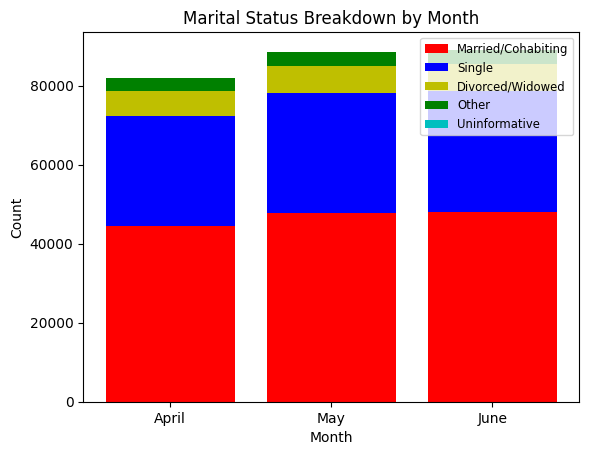

In [13]:
# Marital Status Stacked Bar Chart
x = months
married = []
single = []
divorced = []
other = []
uninformative = []

for i, df in enumerate(dfs): 
    marital = df.loc[:, 'marital_status']
    counts = np.array(marital.value_counts().tolist())
    married.append(counts[0])
    single.append(counts[1])
    divorced.append(counts[2])
    other.append(counts[3])
    uninformative.append(counts[4])

married = np.array(married)
single = np.array(single)
divorced = np.array(divorced)
other = np.array(other)
uninformative = np.array(uninformative)

plt.bar(x, married, color='r')
plt.bar(x, single, bottom = married, color='b')
plt.bar(x, divorced, bottom = married + single, color='y')
plt.bar(x, other, bottom = married + single + divorced, color='g')
plt.bar(x, uninformative, bottom = married + single + divorced + other, color='c')
plt.xlabel('Month')
plt.ylabel("Count")
plt.legend(['Married/Cohabiting', 'Single', 'Divorced/Widowed', 'Other', 'Uninformative'], loc='upper right', fontsize='small')
plt.title('Marital Status Breakdown by Month')
plt.show()

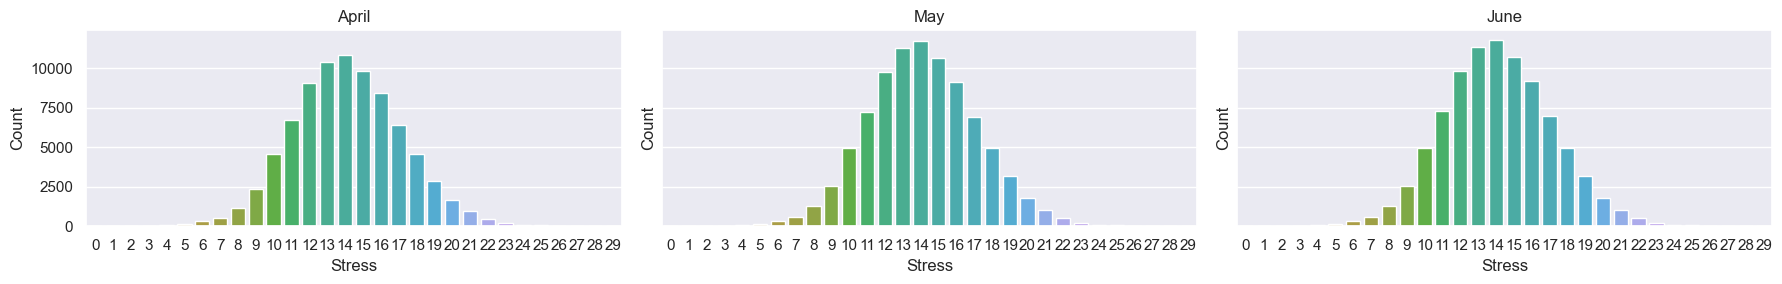

In [34]:
# Stress Count Plot
sns.set(font_scale=1)
fig, axs = plt.subplots(1, len(dfs), figsize=(6*len(dfs),3), sharey=True)

for i, df in enumerate(dfs):
    sns.countplot(x="pss10_composite", y=None, data=df, ax=axs[i])
    axs[i].set(xlabel="Stress", ylabel="Count", title=months[i])
    axs[i].xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    
plt.tight_layout()
plt.show()

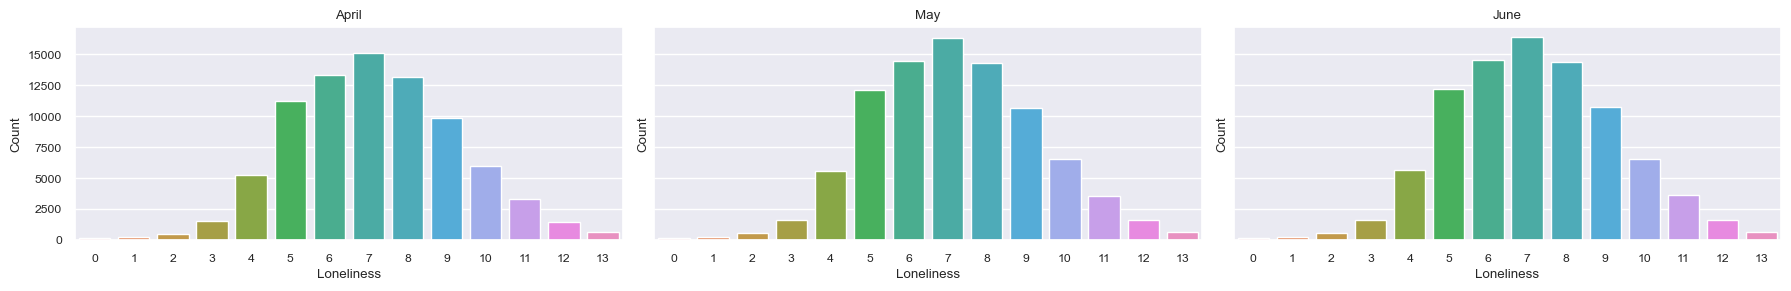

In [31]:
# Loneliness Count Plot
sns.set(font_scale=0.8)
fig, axs = plt.subplots(1, len(dfs), figsize=(6 * len(dfs), 3), sharey=True)

for i, df in enumerate(dfs):
    sns.countplot(x="lon_composite", y=None, data=df, ax=axs[i])
    axs[i].set(xlabel="Loneliness", ylabel="Count", title=months[i])
    axs[i].xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.tight_layout()
plt.show()

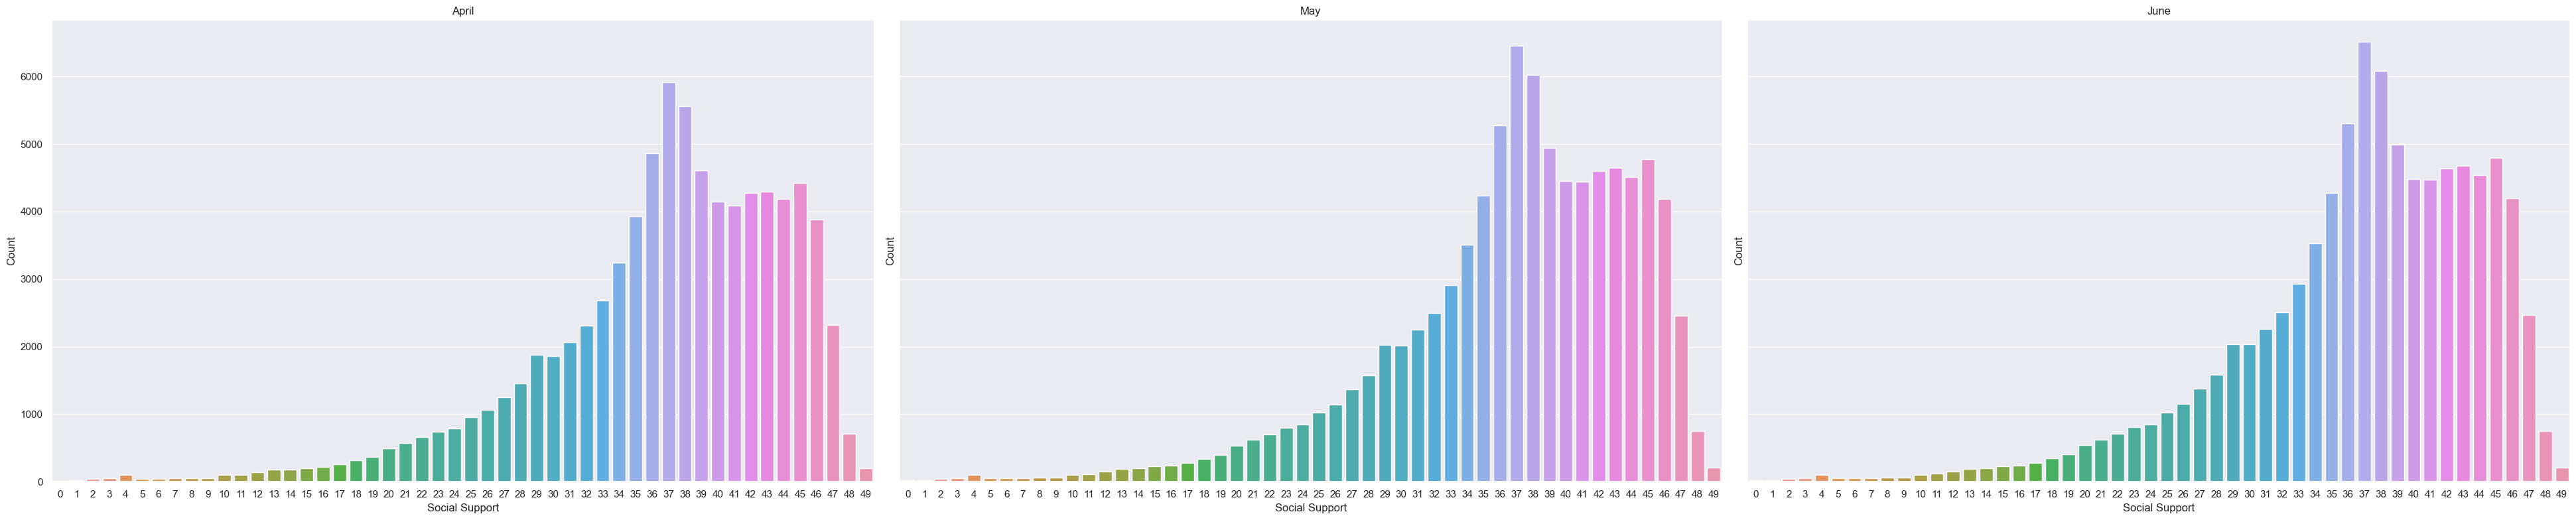

In [30]:
# Social Support Count Plot
sns.set(font_scale=1)
fig, axs = plt.subplots(1, len(dfs), figsize=(13 * len(dfs), 8), sharey=True)

for i, df in enumerate(dfs):
    sns.countplot(x="sps_composite", y=None, data=df, ax=axs[i])
    axs[i].set(xlabel="Social Support", ylabel="Count", title=months[i])
    axs[i].xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.tight_layout()
plt.show()

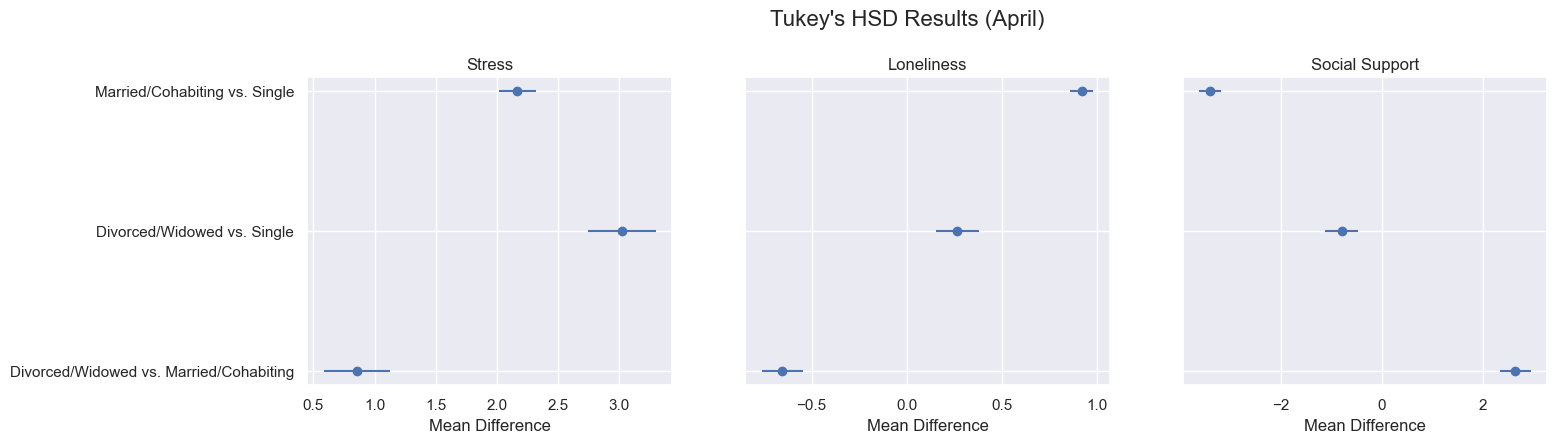

In [37]:
# Tukey's HSD (April)
stress = [
    ("Divorced/Widowed vs. Married/Cohabiting", 0.8548, 0.5868, 1.1228),
    ("Divorced/Widowed vs. Single", 3.0212, 2.7435, 3.2988),
    ("Married/Cohabiting vs. Single", 2.1664, 2.0151, 2.3177)
]
lonely = [
    ("Divorced/Widowed vs. Married/Cohabiting", -0.6539, -0.7627, -0.5452),
    ("Divorced/Widowed vs. Single", 0.2659, 0.1532, 0.3785),
    ("Married/Cohabiting vs. Single", 0.9198, 0.8584, 0.9812)
]
support = [
    ("Divorced/Widowed vs. Married/Cohabiting", 2.6506, 2.342, 2.9591),
    ("Divorced/Widowed vs. Single", -0.8007, -1.1203, -0.481),
    ("Married/Cohabiting vs. Single", -3.415, -3.6254, -3.277)
]
comparisons = [stress, lonely, support]
var_names = ['Stress', 'Loneliness', 'Social Support']
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(1, 3, figsize=(16,4), sharey=True)
fig.suptitle('Tukey\'s HSD Results (April)', fontsize=16, y=1.05)
for i, var in enumerate(comparisons): 
    y_labels, mean_diff, lower, upper = zip(*comparisons[i])
    y_pos = range(len(y_labels))
    axs[i].errorbar(mean_diff, y_pos, xerr=[(mean - l) for mean, l in zip(mean_diff, lower)], fmt='o')
    axs[i].set_yticks(y_pos)
    axs[i].set_yticklabels(y_labels)
    axs[i].set_xlabel('Mean Difference')
    axs[i].set_title(f"{var_names[i]}")    


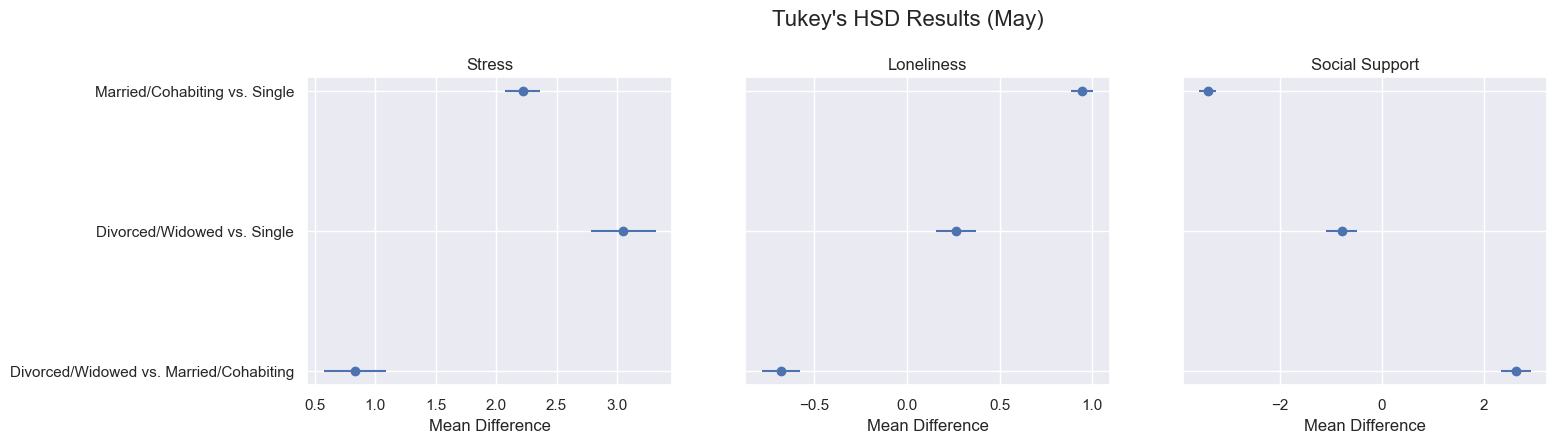

In [38]:
# Tukey's HSD (May)
stress = [
    ("Divorced/Widowed vs. Married/Cohabiting", 0.8328, 0.5763, 1.0893),
    ("Divorced/Widowed vs. Single", 3.0539, 2.7883, 3.3194),
    ("Married/Cohabiting vs. Single", 2.2211, 2.0751, 2.367)
]
lonely = [
    ("Divorced/Widowed vs. Married/Cohabiting", -0.6804, -0.7842, -0.5765),
    ("Divorced/Widowed vs. Single", 0.265, 0.1575, 0.3725),
    ("Married/Cohabiting vs. Single", 0.9454, 0.8863, 1.0045)
]
support = [
    ("Divorced/Widowed vs. Married/Cohabiting", 2.6236, 2.3295, 2.917),
    ("Divorced/Widowed vs. Single", -0.7824, -1.087, -0.4778),
    ("Married/Cohabiting vs. Single", -3.4061, -3.5734, -3.238)
]
comparisons = [stress, lonely, support]
var_names = ['Stress', 'Loneliness', 'Social Support']
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(1, 3, figsize=(16,4), sharey=True)
fig.suptitle('Tukey\'s HSD Results (May)', fontsize=16, y=1.05)
for i, var in enumerate(comparisons): 
    y_labels, mean_diff, lower, upper = zip(*comparisons[i])
    y_pos = range(len(y_labels))
    axs[i].errorbar(mean_diff, y_pos, xerr=[(mean - l) for mean, l in zip(mean_diff, lower)], fmt='o')
    axs[i].set_yticks(y_pos)
    axs[i].set_yticklabels(y_labels)
    axs[i].set_xlabel('Mean Difference')
    axs[i].set_title(f"{var_names[i]}")    


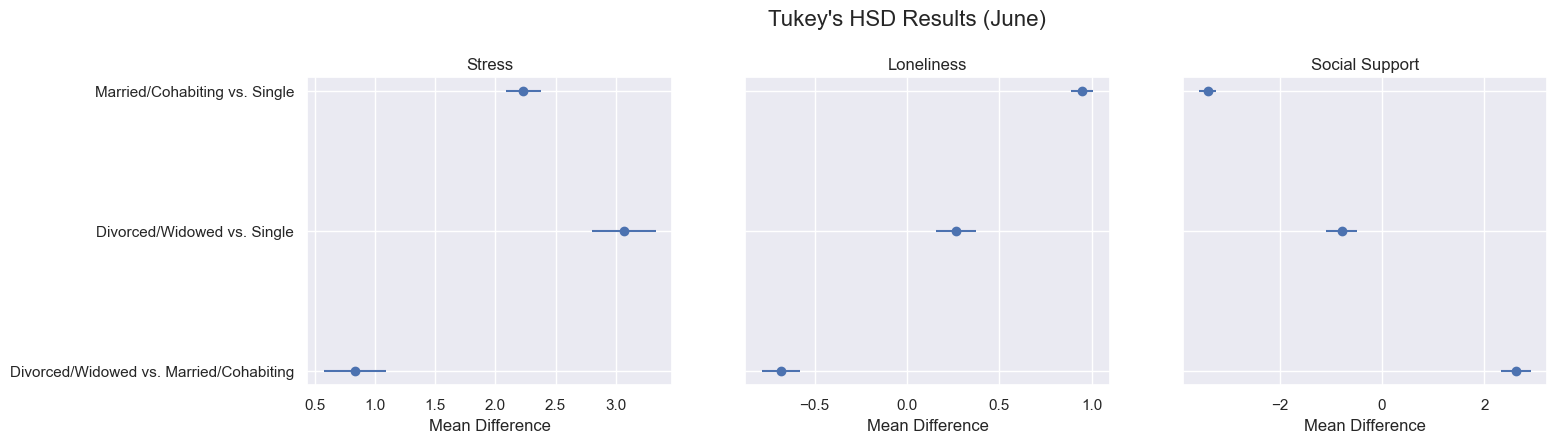

In [39]:
# Tukey's HSD (June)
stress = [
    ("Divorced/Widowed vs Married/Cohabiting", 0.8332, 0.578, 1.0885),
    ("Divorced/Widowed vs Single", 3.0659, 2.8016, 3.2302),
    ("Married/Cohabiting vs Single", 2.2327, 2.0872, 2.3782)
]
lonely = [
    ("Divorced/Widowed vs Married/Cohabiting", -0.6826, -0.786, -0.5793),
    ("Divorced/Widowed vs Single", 0.2665, 0.1595, 0.3735),
    ("Married/Cohabiting vs Single", 0.9492, 0.8902, 1.0081)
]
support = [
    ("Divorced/Widowed vs. Married/Cohabiting", 2.6168, 2.3242, 2.0904),
    ("Divorced/Widowed vs. Single", -0.7915, -1.0945, -0.4885),
    ("Married/Cohabiting vs. Single", -3.4083, -3.5751, -3.2415)
]
comparisons = [stress, lonely, support]
var_names = ['Stress', 'Loneliness', 'Social Support']
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(1, 3, figsize=(16,4), sharey=True)
fig.suptitle('Tukey\'s HSD Results (June)', fontsize=16, y=1.05)
for i, var in enumerate(comparisons): 
    y_labels, mean_diff, lower, upper = zip(*comparisons[i])
    y_pos = range(len(y_labels))
    axs[i].errorbar(mean_diff, y_pos, xerr=[(mean - l) for mean, l in zip(mean_diff, lower)], fmt='o')
    axs[i].set_yticks(y_pos)
    axs[i].set_yticklabels(y_labels)
    axs[i].set_xlabel('Mean Difference')
    axs[i].set_title(f"{var_names[i]}")    
